## Rainfall Prediction

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 : Data Ingestion

In [2]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


* Target feature : rainfall

<Axes: xlabel='rainfall'>

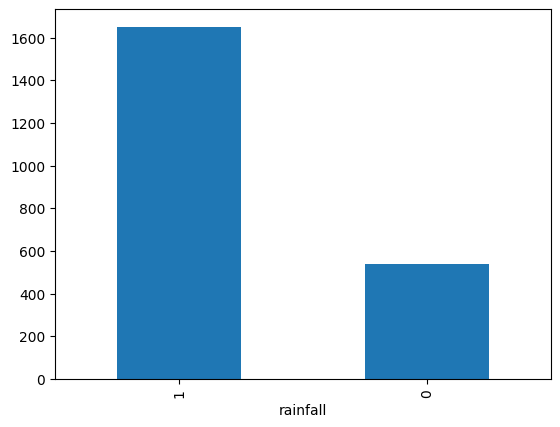

In [3]:
df.rainfall.value_counts().plot(kind="bar")

### Step 2 : Basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


In [5]:
df.isna().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

### Step 3 : Separate X and Y(rainfall)

In [7]:
X = df.drop(columns=["rainfall"])
Y = df[["rainfall"]]

In [8]:
X.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8


In [9]:
Y.head()

,rainfall
0,1
1,1
2,1
3,1
4,0


### Step 4 : Feature Engineering

In [10]:
X.dtypes

id                 int64
day                int64
pressure         float64
maxtemp          float64
temparature      float64
mintemp          float64
dewpoint         float64
humidity         float64
cloud            float64
sunshine         float64
winddirection    float64
windspeed        float64
dtype: object

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [12]:
pre = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
).set_output(transform="pandas")

In [13]:
X_pre = pre.fit_transform(X)
X_pre.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,-1.731260,-1.701361,0.671702,-0.913809,-0.642199,-0.448815,-0.199457,0.636434,0.681269,-0.729397,-0.560901,-0.465291
1,-1.729678,-1.691853,1.043116,-1.798289,-1.350846,-1.259418,-0.956001,1.662224,0.847728,-1.032804,-0.685925,0.009629
2,-1.728097,-1.682346,1.856688,-1.232222,-1.504067,-1.496667,-2.109731,-0.902250,-1.593680,1.256536,-0.435876,-0.374349
3,-1.726515,-1.672838,-0.035752,-1.462187,-1.178472,-1.041939,-0.691210,1.662224,1.069675,-1.032804,-0.560901,1.393971
4,-1.724933,-1.663331,1.449902,-0.896120,-1.063556,-1.378043,-2.052990,-3.851394,-1.704654,-0.039837,-0.810950,0.302665


### Step 5 : train_test_split

In [14]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.3, random_state=21)

In [15]:
xtrain.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
727,-0.581305,1.740372,1.273038,-1.462187,-1.676440,-1.654834,-1.485582,-0.517579,0.847728,-0.977639,-0.935975,-0.162150
1593,0.788518,-0.436857,-0.973129,0.925909,0.621874,0.836287,0.727310,0.892882,0.681269,0.622141,1.564521,0.322875
574,-0.823317,0.285717,-0.831639,1.208943,1.081537,1.113078,1.067755,-0.132908,0.126403,-0.177749,1.064422,-1.586911
1240,0.230149,-0.322766,-0.955443,1.226632,1.215605,1.291015,1.011014,-0.517579,-2.425979,2.221921,1.189446,-1.283770
770,-0.513288,-1.321059,0.936998,-0.843051,-1.140167,-0.903543,-0.861433,-0.517579,0.348349,-1.032804,-0.685925,-0.920002


In [16]:
ytrain.head()

,rainfall
727,1
1593,1
574,1
1240,0
770,1


In [17]:
xtest.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
1268,0.274439,-0.056555,-1.362229,0.872840,0.909164,0.856057,1.105582,1.405776,0.681269,-1.005222,0.314273,0.524968
1896,1.267798,-1.026325,0.760134,-1.709841,-1.599830,-1.615292,-1.788200,1.277553,0.958701,-1.032804,-0.810950,-0.141941
2087,1.569918,0.789617,-1.061561,0.324463,0.296280,0.342017,0.216643,-1.799815,-2.037573,1.228954,1.564521,-1.324189
375,-1.138092,-1.606285,2.121984,-1.709841,-2.116951,-2.485207,-1.731459,-0.902250,0.459322,-0.674233,-0.560901,0.848318
1301,0.326638,0.257194,-1.397602,0.731324,0.602722,0.559496,0.727310,0.636434,0.181890,0.594558,1.564521,-0.909897


In [18]:
ytest.head()

,rainfall
1268,1
1896,0
2087,0
375,1
1301,1


### Step 6 : Build Model
##### 1. RandomForest classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(
    max_depth=2,
    min_samples_leaf=2,
    min_samples_split=2,
    criterion="entropy"
)
model1.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_leaf=2)

In [20]:
model1.score(xtrain, ytrain)

0.868232224396608

In [21]:
model1.score(xtest, ytest)

0.832572298325723

* Hyperparameter Tuning

In [22]:
params1 = {
    "max_depth" : [2, 3, 4, 5, 6],
    "min_samples_split" : [2, 3, 4, 5, 6, 7, 8],
    "min_samples_leaf" : [2, 3, 4, 5, 6, 7, 8, 9],
    "criterion" : ["gini", "entropy"],
    "n_estimators" : [50, 100, 150, 200, 250, 300]
}

In [23]:
from sklearn.model_selection import RandomizedSearchCV

base_model1 = RandomForestClassifier()

rscv_rf = RandomizedSearchCV(base_model1, param_distributions=params1, cv=5, scoring="f1_macro", n_jobs=-1)
rscv_rf.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   scoring='f1_macro')

In [24]:
rscv_rf.best_score_

np.float64(0.8154387809135771)

In [25]:
rscv_rf.best_params_

{'n_estimators': 250,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': 5,
 'criterion': 'entropy'}

In [26]:
best_rf = rscv_rf.best_estimator_
best_rf

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=6, n_estimators=250)

In [27]:
best_rf.score(xtrain, ytrain)

0.8904109589041096

In [28]:
best_rf.score(xtest, ytest)

0.8584474885844748

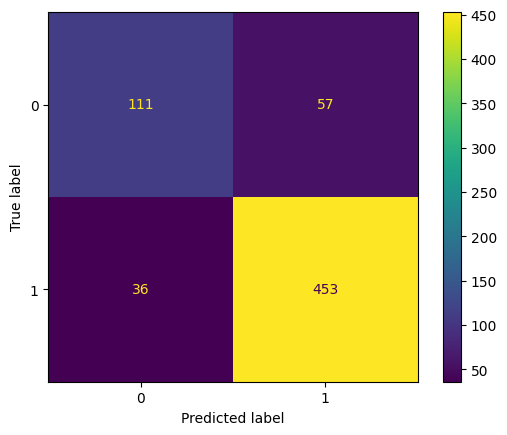

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_rf, xtest, ytest)

In [30]:
best_rf.feature_importances_

array([0.02085734, 0.02399883, 0.03465798, 0.03133362, 0.0291948 ,
       0.02815025, 0.04061661, 0.14431512, 0.35718055, 0.25492218,
       0.01366332, 0.02110941])

In [31]:
ytest_pred = best_rf.predict(xtest)
ytest_pred[0:5]

array([1, 1, 0, 1, 1])

In [32]:
from sklearn.metrics import classification_report
print(classification_report( ytest, ytest_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       168
           1       0.89      0.93      0.91       489

    accuracy                           0.86       657
   macro avg       0.82      0.79      0.81       657
weighted avg       0.85      0.86      0.86       657



#### 2. Gradientboost classifier

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=2
)
model2.fit(xtrain, ytrain)

GradientBoostingClassifier(max_depth=2)

In [34]:
model2.score(xtrain, ytrain)

0.9015003261578604

In [35]:
model2.score(xtest, ytest)

0.8599695585996956

* Hyperparameter Tuning

In [36]:
params2 = {
    "n_estimators" : [50, 100, 150, 200, 250, 300],
    "max_depth" : [2, 3, 4, 5, 6, 7],
    "min_samples_split" : [2, 3, 4, 5, 6, 7, 8, 9],
    "min_samples_leaf" : [2, 3, 4, 5, 6, 7, 8, 9]
}

In [37]:
base_model2 = GradientBoostingClassifier()

rscv_gb = RandomizedSearchCV(base_model2, params2, cv=5, scoring="f1_macro", n_jobs=-1)
rscv_gb.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   scoring='f1_macro')

In [38]:
rscv_gb.score(xtrain, ytrain)

0.8373933543226946

In [39]:
rscv_gb.best_params_

{'n_estimators': 50,
 'min_samples_split': 9,
 'min_samples_leaf': 7,
 'max_depth': 2}

In [40]:
rscv_gb.best_score_

np.float64(0.8164221616160011)

In [41]:
best_gb = rscv_gb.best_estimator_
best_gb

GradientBoostingClassifier(max_depth=2, min_samples_leaf=7, min_samples_split=9,
                           n_estimators=50)

In [42]:
best_gb.score(xtrain, ytrain)

0.8871493803000652

In [43]:
best_gb.score(xtest, ytest)

0.8660578386605784

In [44]:
ytest_pred2 = best_gb.predict(xtest)
ytest_pred2[0:5]

array([1, 1, 0, 1, 1])

In [45]:
ytest.head(5)

,rainfall
1268,1
1896,0
2087,0
375,1
1301,1


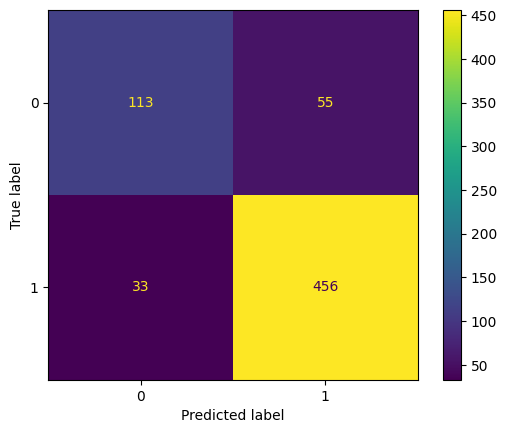

In [46]:
ConfusionMatrixDisplay.from_estimator(best_gb, xtest, ytest)

In [47]:
print(classification_report(ytest, ytest_pred2))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72       168
           1       0.89      0.93      0.91       489

    accuracy                           0.87       657
   macro avg       0.83      0.80      0.82       657
weighted avg       0.86      0.87      0.86       657



##### 3. XGBoostClassifier

In [48]:
import xgboost

In [49]:
from xgboost import XGBClassifier
model3 = XGBClassifier(
    max_depth = 3,
    n_estimators = 100,
    learning_rate = 0.03
)
model3.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [50]:
model3.score(xtrain, ytrain)

0.8904109589041096

In [51]:
model3.score(xtest, ytest)

0.8554033485540334

* Hyperparameter tuning

In [52]:
params3 = {
    "n_estimators" : [50, 100, 150, 200, 250, 300],
    "max_depth" : [2, 3, 4, 5, 6, 7, 8, 9],
    "learning_rate" : [0.01, 0.02, 0.03, 0.5]
}

In [53]:
base_model3 = XGBClassifier()

rscv_xgb = RandomizedSearchCV(base_model3, param_distributions=params3, cv=5, scoring="f1_macro", n_jobs=-1)

rscv_xgb.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.02, 0.03,
                                                          0.5],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   scoring='f1_macro')

In [54]:
rscv_xgb.score(xtrain, ytrain)

0.8904834856049721

In [55]:
rscv_xgb.best_score_

np.float64(0.811356938884581)

In [56]:
rscv_xgb.score(xtest, ytest)

0.7982496545370796

In [57]:
best_rgb = rscv_xgb.best_estimator_
best_rgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

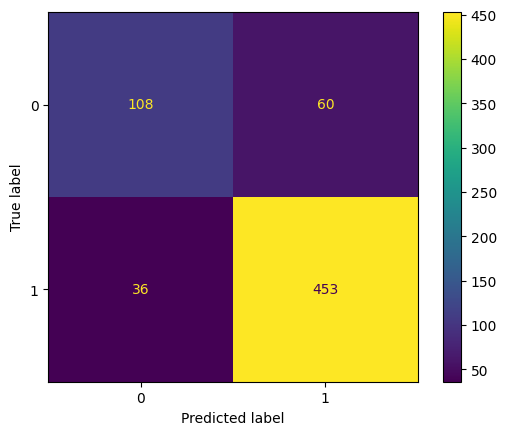

In [58]:
ConfusionMatrixDisplay.from_estimator(rscv_xgb, xtest, ytest)

In [59]:
ytest_pred3 = best_rgb.predict(xtest)
ytest_pred3[0:5]

array([1, 1, 0, 1, 1])

In [60]:
ytest.head(5)

,rainfall
1268,1
1896,0
2087,0
375,1
1301,1


In [61]:
print(classification_report(ytest, ytest_pred3))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       168
           1       0.88      0.93      0.90       489

    accuracy                           0.85       657
   macro avg       0.82      0.78      0.80       657
weighted avg       0.85      0.85      0.85       657



In [62]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(
    max_depth=2,
    min_samples_leaf=2,
    min_samples_split=2,
    criterion="entropy"
)
model4.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=2)

In [63]:
model4.score(xtrain, ytrain)

0.8447488584474886

In [64]:
model4.score(xtest, ytest)

0.837138508371385

In [65]:
params4 = {
    "max_depth" : [2, 3, 4, 5, 6, 7, 8],
    "min_samples_leaf" : [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    "min_samples_split" : [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    "criterion" : ["entropy", "gini"]
}

In [66]:
base_model4 = DecisionTreeClassifier()

rscv_dtc = RandomizedSearchCV(base_model4, param_distributions=params4, cv=5, n_jobs=-1, scoring="f1_macro")
rscv_dtc.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 11],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11]},
                   scoring='f1_macro')

In [67]:
rscv_dtc.score(xtrain, ytrain)

0.8212726692190746

In [68]:
rscv_dtc.score(xtest, ytest)

0.8123370010680311

In [69]:
rscv_dtc.best_score_

np.float64(0.8025572075159081)

In [70]:
best_dtc = rscv_dtc.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=3, min_samples_leaf=11, min_samples_split=11)

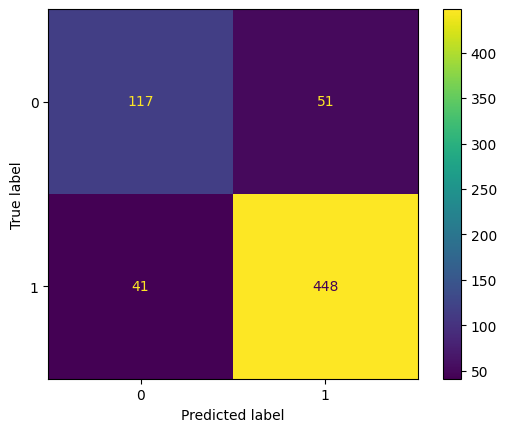

In [71]:
ConfusionMatrixDisplay.from_estimator(best_dtc, xtest, ytest)

In [72]:
ytest_pred_4 = best_dtc.predict(xtest)
ytest_pred_4[0:5]

array([1, 1, 0, 1, 1])

In [73]:
print(classification_report(ytest, ytest_pred_4))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       168
           1       0.90      0.92      0.91       489

    accuracy                           0.86       657
   macro avg       0.82      0.81      0.81       657
weighted avg       0.86      0.86      0.86       657



* Best Model = RandomForestClassifier

### Step 8 : out of sample predictions

In [74]:
xnew = pd.read_csv("test.csv")
xnew

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4
...,...,...,...,...,...,...,...,...,...,...,...,...
725,2915,361,1020.8,18.2,17.6,16.1,13.7,96.0,95.0,0.0,20.0,34.3
726,2916,362,1011.7,23.2,18.1,16.0,16.0,78.0,80.0,1.6,40.0,25.2
727,2917,363,1022.7,21.0,18.5,17.0,15.5,92.0,96.0,0.0,50.0,21.9
728,2918,364,1014.4,21.0,20.0,19.7,19.8,94.0,93.0,0.0,50.0,39.5


In [75]:
pre

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [76]:
X.shape

(2190, 12)

In [77]:
X.columns

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [78]:
xnew.shape

(730, 12)

In [79]:
xnew.columns

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [80]:
xnew_pre = pre.transform(xnew)
xnew_pre

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1.732842,-1.701361,1.043116,-1.568324,-1.561525,-1.872313,-1.050569,1.790447,1.291621,-1.032804,-0.685925,0.252142
1,1.734424,-1.691853,0.512525,-1.568324,-1.427456,-1.259418,-1.012742,1.918671,1.291621,-1.032804,-0.685925,1.363657
2,1.736005,-1.682346,1.821316,-2.682769,-2.595766,-2.524749,-2.185385,0.508211,1.125161,-1.032804,-0.810950,-0.495605
3,1.737587,-1.672838,1.644452,-1.019947,-1.274235,-1.378043,-2.071904,-0.902250,-1.704654,0.925547,-1.061000,2.909674
4,1.739169,-1.663331,1.520647,-1.815979,-1.944577,-3.117873,-3.055411,-1.799815,-1.482707,1.504778,-1.061000,-0.242988
...,...,...,...,...,...,...,...,...,...,...,...,...
725,2.879634,1.721357,1.273038,-1.444497,-1.216777,-1.200105,-1.277532,1.790447,1.069675,-1.032804,-1.061000,1.262611
726,2.881215,1.730865,-0.336420,-0.560017,-1.121014,-1.219876,-0.842519,-0.517579,0.237376,-0.591485,-0.810950,0.343084
727,2.882797,1.740372,1.609079,-0.949188,-1.044404,-1.022168,-0.937087,1.277553,1.125161,-1.032804,-0.685925,0.009629
728,2.884379,1.749880,0.141111,-0.949188,-0.757114,-0.488357,-0.123802,1.534000,0.958701,-1.032804,-0.685925,1.788054


In [81]:
preds = best_rf.predict(xnew)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [82]:
results = xnew[["id"]]
results

,id
0,2190
1,2191
2,2192
3,2193
4,2194
...,...
725,2915
726,2916
727,2917
728,2918


In [83]:
results["rainfall"] = preds

In [84]:
results

,id,rainfall
0,2190,1
1,2191,1
2,2192,1
3,2193,1
4,2194,1
...,...,...
725,2915,1
726,2916,1
727,2917,1
728,2918,1


In [85]:
results.to_csv("Results.csv")